In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [2]:
data_train = pd.read_csv('../finance_dataset/train.csv')

In [145]:
data_test = pd.read_csv('../finance_dataset/testA.csv')

填充缺失值

In [9]:
# employmentLength为类别型变量，使用前填充，
data_train.fillna(method='ffill',inplace=True)

In [10]:
# 验证，已经没有缺失值
data_train.isnull().sum()

id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9              

In [11]:
data_train[:20]

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,9.0,8.0,4.0,12.0,2.0,13.0,0.0,0.0,0.0,2.0
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,10+ years,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
5,5,11000.0,3,7.99,344.65,A,A5,51727.0,7 years,0,...,1.0,48.0,2.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0
6,6,2050.0,3,7.69,63.95,A,A4,180083.0,9 years,0,...,11.0,3.0,10.0,18.0,3.0,12.0,0.0,0.0,0.0,3.0
7,7,11500.0,3,14.98,398.54,C,C3,214017.0,1 year,1,...,16.0,10.0,5.0,21.0,4.0,8.0,0.0,0.0,0.0,2.0
8,8,12000.0,3,12.99,404.27,C,C2,188.0,5 years,2,...,7.0,2.0,13.0,17.0,11.0,15.0,0.0,0.0,0.0,6.0
9,9,6500.0,3,10.99,212.78,B,B4,54.0,5 years,1,...,21.0,24.0,6.0,39.0,5.0,7.0,0.0,0.0,0.0,8.0


### 时间格式处理

In [15]:
# issueDataDT得到的是天数
for data in [data_train]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
    startdate = datetime.datetime.strptime('2007-06-01','%Y-%m-%d')
    data['issueDataDT'] = data['issueDate'].apply(lambda x:x-startdate).dt.days

In [28]:
# 2007-06-01是最小日期
data.loc[data_train['issueDataDT']<=0,'issueDate']

647313   2007-06-01
Name: issueDate, dtype: datetime64[ns]

In [46]:
# earliesCreditLine为类别型数据，但是，类别太多，取出earliesCreditLine年份
for data in [data_train]:
    data['earliesCreditLine'] = data_train['earliesCreditLine'].apply(lambda x:int(x[-4:]))
    

In [30]:
# sort_index按照索引排序
data_train['employmentLength'].value_counts().sort_index()

1 year        55842
10+ years    278860
2 years       76742
3 years       68149
4 years       50932
5 years       53186
6 years       39575
7 years       37622
8 years       38551
9 years       32225
< 1 year      68316
Name: employmentLength, dtype: int64

### 对象类型特征转换到数值

去掉只有一个值的特征policyCode
isDafault是标签变量
issueDate已经被转化为了天数
earliesCreditLine为类别型数据，转化为天数
grade有优先级，需要进行标签编码，而不是onehot编
employmentLength 将年份提取出来

In [32]:
['grade', 'subGrade', 'employmentLength', 'issueDate','earliesCreditLine']+['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'purpose',
 'pubRecBankruptcies',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [49]:
# 因为grade有优先级，亦等级，所以要标签编码
dict_grade = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
for data in [data_train]:
    data['grade'] = data['grade'].map(dict_grade)

In [56]:
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return int(s.split()[0])
for data in [data_train]:
    data['employmentLength'].replace('10+ years','10 years',inplace=True)
    data['employmentLength'].replace('< 1 year','0 years',inplace=True)
    data['employmentLength']=data['employmentLength'].apply(employmentLength_to_int)

In [57]:
cate_feature=[ 'subGrade','term', 'homeOwnership','verificationStatus','purpose','pubRecBankruptcies',
 'initialListStatus','applicationType','n11','n12']

In [63]:
data_train[cate_feature].nunique()

subGrade              35
term                   2
homeOwnership          6
verificationStatus     3
purpose               14
pubRecBankruptcies    11
initialListStatus      2
applicationType        2
n11                    5
n12                    5
dtype: int64

In [70]:
for data in [data_train]:
    data_train_cated = pd.get_dummies(data,columns=cate_feature,drop_first=True)


In [75]:
# 由此可见，都转化为了数值类型
data_train_cated.select_dtypes(exclude='object').shape

(800000, 113)

## 异常值处理

In [76]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [82]:
numerical_fea=['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [87]:
data_train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

In [86]:
data_train = data_train_cated.copy()
for fea in numerical_fea:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print('mmmmmmmmmmmmmmmmmmmmm')
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

正常值    800000
Name: id_outliers, dtype: int64
mmmmmmmmmmmmmmmmmmmmm
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: loanAmnt_outliers, dtype: int64
mmmmmmmmmmmmmmmmmmmmm
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
mmmmmmmmmmmmmmmmmmmmm
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
mmmmmmmmmmmmmmmmmmmmm
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
mmmmmmmmmmmmmmmmmmmmm
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    793973
异常值      6027
Name: annualIncome_outliers, dtype: int64
mmmmmmmmmmmmmmmmmmmmm
annualIncome_outliers
异常值       756
正常值    158854
Name: isDefault, dtype: int64
**********
正常值    798

### 分箱

#### 固定宽度分箱

In [95]:
# 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是loanAmnt/1000,只取整，不要余数
data['loanAmnt_bin1'] = np.floor_divide(data['loanAmnt'], 1000)

In [88]:
## 通过对数函数映射到指数宽度分箱
data['loanAmnt_bin2'] = np.floor(np.log10(data_train['loanAmnt']))

In [90]:
data['loanAmnt_bin2'].value_counts()

4.0    528623
3.0    271370
2.0         7
Name: loanAmnt_bin2, dtype: int64

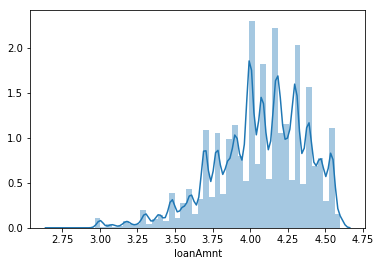

In [93]:
sns.distplot(np.log10(data_train['loanAmnt']))

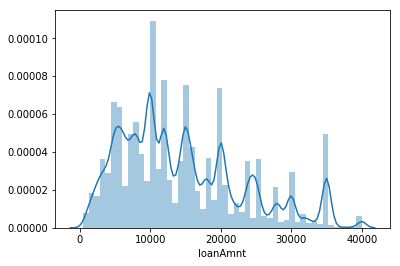

In [94]:
sns.distplot(data_train['loanAmnt'])

#### 分位数分箱-不太懂

In [102]:
data_train['loanAmnt_bin3'] = pd.qcut(data_train['loanAmnt'],10,labels=False)

In [109]:
pd.qcut(range(5), 4, labels=False)

array([0, 0, 1, 2, 3], dtype=int64)

In [144]:
data_train['employmentTitle'].nunique()

248683

In [151]:
for col in tqdm(['employmentTitle', 'postCode', 'title']):
    le = LabelEncoder()
    le.fit(list(data_train[col].astype(str).values) + list(data_test[col].astype(str).values))
    data_train[col] = le.transform(list(data_train[col].astype(str).values))
    data_test[col] = le.transform(list(data_test[col].astype(str).values))
print('Label Encoding 完成')

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.50s/it]

Label Encoding 完成


In [155]:
data_train['employmentTitle']

0         192025
1         104733
2         189509
3         249631
4         256267
5         254160
6          70697
7          99661
8          77517
9         256267
10        249434
11         36564
12         35260
13        252255
14          9281
15        133115
16         87752
17        281585
18        194567
19        138823
20        234011
21         97011
22        247449
23        241933
24        288177
25         42987
26        104148
27        245419
28        155953
29        204713
           ...  
799970    231188
799971    193469
799972    256267
799973     34842
799974    271601
799975     43418
799976     24146
799977     55723
799978      2664
799979    169366
799980     47632
799981    256267
799982    272904
799983    242389
799984    221162
799985    245754
799986     71279
799987     71680
799988    145534
799989    256267
799990    227972
799991      1308
799992    256267
799993     31300
799994    168024
799995    145357
799996    168143
799997    1387